# Late Holocene West Antarctic Ice Sheet Readvance:  comparing models to measurements

 #### RCES Final Project :: Roger Creel :: Thursday December 6, 2018


 Ice sheets can grow and shrink rapidly.  The solid earth on which ice sheets rest, however, moves more slowly, thanks to the viscosity of the mantle on which continents float.  This perpetual disequilibrium can lead to negative feedback loops, where ice sheet retreat triggers a slower solid earth response to ice sheet mass changes (Glacial Isostatic Adjustment, or GIA), which stabilizes the ice sheets and causes a readvance.  
 
 Recent field evidence from West Antarctica suggests that such a negative feedback loop drove a West Antarctic Ice Sheet (WAIS) readvance in the late holocene.  Evidence for this readvance includes radiocarbon dating of subglacial sediments in Antarctica's Ross Sea sector and ice-penetrating radar observations in the Weddell Sea sector.  This readvance contravenes most Holocene ice sheet models, which hold ice sheet volumes steady during the last six thousand years.  
 
 If true, such a readvance would have affected relative sea levels during the late Holocene.  To explore the sea level implications of WAIS readvance, I compare two models: Ice-6G, a standard coupled ice-earth model, and a regional model of Antarctica made by Torsten Albrecht that simulates the WAIS readvance. I ran each of these models through a sea level algorithm that incorporates shoreline migration, rotational changes(Kendall et al., 2005; Dalca et al., 2013), an elastic structure (Dziewonski and Anderson, 1981), and radial viscosity structure VM5  Peltier et al., 2005).  
 
 This project is organized as follows:


(1) Visualize sea level predictions from ICE-6G, a coupled ice-earth model that includes glacial isostatic adjustment (GIA).  I compare the ICE-6G output to sea level predictions from a hybrid model (ICE-Jonny) that combines ICE-6G with an unpublished ice sheet model from Jonny Kingslake and Torsten Albrecht simulating West Antarctic Ice Sheet (WAIS) re-advance in the late Holocene. 

(2) Visualize a database of local measurements of Holocene relative sea level (RSL) compiled by Nicole Khan from published sources, a portion of which were published in 2015 [1]; 

(3) Compare local sea level measurements from Khan's database to ICE-6G & ICE-Jonny sea level predictions 

These visualizations will answer the following scientific questions:  

In what locations and by how much do the ICE-6G and ICE-Jonny sea level predictions differ?  In areas where ICE-Jonny predicts a late Holocene WAIS readvance, do local RSL measurements confirm these predictions?  

[1].  Khan, Nicole S., Erica Ashe, Timothy A. Shaw, Matteo Vacchi, Jennifer Walker, W.R. Peltier, Robert E. Kopp, and Benjamin P. Horton. “Holocene Relative Sea-Level Changes from Near-, Intermediate-, and Far-Field Locations.” Current Climate Change Reports 1, no. 4 (December 1, 2015): 247–62. https://doi.org/10.1007/s40641-015-0029-z.


  using a dataset from Nicole Khan,
  ####  $\hspace{3.5cm}$GIA Sea Level code from Jacky Austermann,
  ####   $\hspace{4cm}$and a model from Torsten Albrecht
  ###  $\hspace{4.6cm}$December 6, 2018

# Part 1:  Ice Sheet models processed with GIA sea level code

In [ ]:
# Download datasets

!wget https://raw.githubusercontent.com/rcameronc/RCES_finalproject/master/HOLSEAdata_120816_3.csv
!wget https://ndownloader.figshare.com/files/13706621
!wget https://ndownloader.figshare.com/files/13706678
!wget https://ndownloader.figshare.com/files/13706687
!wget https://ndownloader.figshare.com/files/13706663
!wget https://ndownloader.figshare.com/files/13706684
!wget https://ndownloader.figshare.com/files/13706690

## _Import packages, open netcdf files, and write variables_

In [3]:
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy
import scipy.io as sio
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Jonny Kingslake/Torsten's Antarctica Ice sheet model
dsj  = xr.open_dataset('jonnymod_112318_1.nc') 
j_time = dsj.TIME.values
j_LON = dsj.LON.values
j_LAT = dsj.LAT.values
j_esl = dsj.ESL 
j_rsl = dsj.RSL
j_TOPO = dsj.topo


# ice 6G ice sheet model > -60 latitude
dsi  = xr.open_dataset('ice6g_112318_1.nc')
LON = dsi.LON.values
LAT = dsi.LAT.values
esl = dsi.esl 
rsl = dsi.rsl
TOPO = dsi.topo
time = dsi.TIME

# Ice-6G > -60 latitude (i.e. all except Antarctica) + Jonny model 
dsc  = xr.open_dataset('ice_6G_Jonny_vars.nc')
Time_ = dsc.time.values
# Lat = dsi.lat.values
# Lon = dsi.lon.values
LON_ = dsc.LON.values
LAT_ = dsc.LAT.values
esl_ = dsc.esl * -1 
rsl_ = dsc.rsl


# ice 6G complete ice sheet model 
dsif = xr.open_dataset('ice6g_112518.nc') 
Time_if = dsif.time.values
# Lat = dsi.lat.values
# Lon = dsi.lon.values
LON_if = dsif.LON.values
LAT_if = dsif.LAT.values
esl_if = dsif.esl * -1 
rsl_if = dsif.rsl
TOPO_if = dsif.topo


# ice 6G ice sheet model < -60 latitude (Only Antarctica)
dsia = xr.open_dataset('ice_6G_antonly_vars.nc')
Time_ia = dsia.time.values
# Lat = dsi.lat.values
# Lon = dsi.lon.values
LON_ia = dsia.LON.values
LAT_ia = dsia.LAT.values
esl_ia = dsia.esl 
rsl_ia = dsia.rsl


# Ice-6G > -60 latitude (i.e. all except Antarctica) + Jonny model, but
# with Ant. ice sheet set to present values at 4000 ka in order to visualize 
# GIA without the WAIS readvance
dscp = xr.open_dataset('ice_6G_Jonny_4kyr_setto_pres.nc') 

Time_cp = dscp.time.values
LON_cp = dscp.LON.values
LAT_cp = dscp.LAT.values
esl_cp = dscp.esl * -1 
rsl_cp = dscp.rsl



In [ ]:
import pandas as pd
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib.patches as mpatches

# Jonny Kingslake/Torsten's Antarctica Ice sheet model
dsj  = xr.open_dataset('13706663') 
j_time = dsj.TIME.values
j_LON = dsj.LON.values
j_LAT = dsj.LAT.values
j_esl = dsj.ESL 
j_rsl = dsj.RSL
j_TOPO = dsj.topo


# ice 6G ice sheet model > -60 latitude
dsi  = xr.open_dataset('13706678')
LON = dsi.LON.values
LAT = dsi.LAT.values
esl = dsi.esl 
rsl = dsi.rsl
TOPO = dsi.topo
time = dsi.TIME

# Ice-6G > -60 latitude (i.e. all except Antarctica) + Jonny model 
dsc  = xr.open_dataset('13706690')
Time_ = dsc.time.values
# Lat = dsi.lat.values
# Lon = dsi.lon.values
LON_ = dsc.LON.values
LAT_ = dsc.LAT.values
esl_ = dsc.esl * -1 
rsl_ = dsc.rsl


# ice 6G complete ice sheet model 
dsif = xr.open_dataset('13706684') 
Time_if = dsif.time.values
# Lat = dsi.lat.values
# Lon = dsi.lon.values
LON_if = dsif.LON.values
LAT_if = dsif.LAT.values
esl_if = dsif.esl * -1 
rsl_if = dsif.rsl
TOPO_if = dsif.topo


# ice 6G ice sheet model < -60 latitude (Only Antarctica)
dsia = xr.open_dataset('13706687')
Time_ia = dsia.time.values
# Lat = dsi.lat.values
# Lon = dsi.lon.values
LON_ia = dsia.LON.values
LAT_ia = dsia.LAT.values
esl_ia = dsia.esl 
rsl_ia = dsia.rsl


# Ice-6G > -60 latitude (i.e. all except Antarctica) + Jonny model, but
# with Ant. ice sheet set to present values at 4000 ka in order to visualize 
# GIA without the WAIS readvance
dscp = xr.open_dataset('13706621') 

Time_cp = dscp.time.values
LON_cp = dscp.LON.values
LAT_cp = dscp.LAT.values
esl_cp = dscp.esl * -1 
rsl_cp = dscp.rsl

In [4]:
# Rearrange time variable for comp dataset to read in descending order with 
# values that correspond to **comp** RSL and ESL values
j_time_ = dsj.TIME[::-1].values
comp_time_ = np.zeros(np.size(j_time_))
for i in range(0, np.size(j_time_)):
    if j_time_[i] < 26:
        comp_time_[i] = j_time_[i]
        
comp_time_f = comp_time_[260:]
comp_time_k = comp_time_[:260]
comp_time_h = comp_time_k[::-1]
comp_time = np.hstack([comp_time_f, comp_time_h])

To organize the ice sheet variables, I build xarray datasets for each ice sheet model:  

+ jonny = Jonny Kingslake/Torsten's Antarctica Ice sheet model
+ ice6g = Ice6g > -60 latitude
+ ice6g_f = the full ice6g model
+ ice6g_a = ice_6G ice sheet model < -60 latitude (Only Antarctica)
+ comp = ice-6G > -60 latitude (i.e. all except Antarctica) + Torsten's model 
+ comp_p = Ice-6G > -60 latitude (i.e. all except Antarctica) + Jonny model, but with Ant. ice sheet set to present values at 4000 ka in order to visualize GIA without the WAIS readvance

In [5]:
# Build Xarray dataframes for each ice model


jonny = xr.Dataset(
        data_vars={'RSL':    (('time', 'lon', 'lat'), j_rsl),
                   'ESL': (('time'), j_esl),
                   'topo': (('time',  'lon', 'lat'), j_TOPO)},
        coords={'time': j_time,
                'lat': j_LAT,
                'lon': j_LON})

ice6g = xr.Dataset(
        data_vars={'RSL':    (('time', 'lon', 'lat'), rsl),
                   'ESL': (('time'), esl),
                   'topo': (('time',  'lon', 'lat'), TOPO)},
        coords={'time': time,
                'lat': LAT,
                'lon': LON})

ice6g_f = xr.Dataset(
        data_vars={'RSL':    (('time', 'lon', 'lat'), rsl_if),
                   'ESL': (('time'), esl_if),
                   'topo': (('time',  'lon', 'lat'), TOPO_if)},
        coords={'time': time,
                'lat': LAT_if,
                'lon': LON_if})

ice6g_a = xr.Dataset(
        data_vars={'RSL':    (('time', 'lon', 'lat'), rsl_ia),
                   'ESL': (('time'), esl_ia)},
        coords={'time': time,
                'lat': LAT_ia,
                'lon': LON_ia})


comp = xr.Dataset(
        data_vars={'RSL':    (('time', 'lon', 'lat'), rsl_),
                   'ESL': (('time'), esl_)},
        coords={'time': comp_time,
                'lat': LAT_,
                'lon': LON_})


comp_p = xr.Dataset(
        data_vars={'RSL':    (('time', 'lon', 'lat'), rsl_cp),
                   'ESL': (('time'), esl_cp)},
        coords={'time': comp_time,
                'lat': LAT_cp,
                'lon': LON_cp})
comp_p

<xarray.Dataset>
Dimensions:  (lat: 256, lon: 512, time: 349)
Coordinates:
  * time     (time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.3498 0.2498 0.1499 0.04997
  * lat      (lat) float64 89.46 88.77 88.07 87.37 ... -88.07 -88.77 -89.46
  * lon      (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Data variables:
    RSL      (time, lon, lat) float64 82.91 84.77 87.12 89.68 ... 0.0 0.0 0.0
    ESL      (time) float64 76.17 76.17 76.17 76.17 ... -0.0 -0.0 -0.0 -0.0

#   $\hspace{5cm}$ RSL projections 

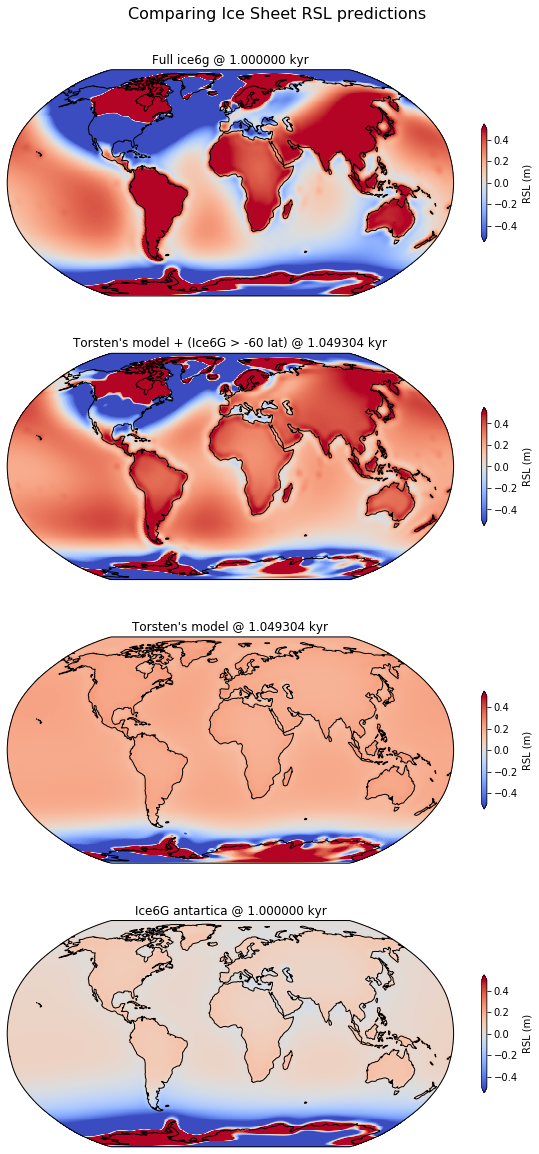

In [10]:
fig = plt.figure(figsize=[10, 20])
fig.suptitle( 'Comparing Ice Sheet RSL predictions', y=.92, fontsize=16)

ax0 = plt.subplot(4, 1, 1, projection=ccrs.Robinson())
ax0.add_feature(cartopy.feature.LAND, zorder=0, facecolor='b', edgecolor='k')
ax0.coastlines()
ax0 = ice6g_f.RSL[45].transpose().plot(vmin=-0.5, vmax = 0.5, cmap='coolwarm', transform=ccrs.PlateCarree(), 
                                     cbar_kwargs={'shrink':0.5, 'extend':'both',
                                                  'label':'RSL (m)'})
plt.title( 'Full ice6g @ %f kyr' % ice6g_f.RSL[45].time.values);

ax1 = plt.subplot(4, 1, 2, projection=ccrs.Robinson())
ax1.add_feature(cartopy.feature.LAND, zorder=0, facecolor='b', edgecolor='k')
ax1.coastlines()
ax1 = comp.RSL[338].transpose().plot(vmin=-0.5, vmax = 0.5, cmap='coolwarm', transform=ccrs.PlateCarree(), 
                                     cbar_kwargs={'shrink':0.5, 'extend':'both', 
                                                  'label':'RSL (m)'})
plt.title('Torsten\'s model + (Ice6G > -60 lat) @ %f kyr' % comp.RSL[338].time.values);


ax4 = plt.subplot(4, 1, 3, projection=ccrs.Robinson())
ax4.add_feature(cartopy.feature.LAND, zorder=0, facecolor='b', edgecolor='k')
ax4.coastlines()
ax4 = jonny.RSL[338].transpose().plot(vmin=-0.5, vmax = 0.5, cmap='coolwarm', transform=ccrs.PlateCarree(), 
                                     cbar_kwargs={'shrink':0.5, 'extend':'both', 
                                                  'label':'RSL (m)'})
plt.title('Torsten\'s model @ %f kyr' % jonny.RSL[338].time.values);

ax5 = plt.subplot(4, 1, 4, projection=ccrs.Robinson())
ax5.add_feature(cartopy.feature.LAND, zorder=0, facecolor='b', edgecolor='k')
ax5.coastlines()
ax5 = ice6g_a.RSL[45].transpose().plot(vmin=-0.5, vmax = 0.5, cmap='coolwarm', transform=ccrs.PlateCarree(), 
                                     cbar_kwargs={'shrink':0.5, 'extend':'both', 
                                                  'label':'RSL (m)'})
plt.title('Ice6G antartica @ %f kyr' % ice6g_a.RSL[45].time.values);

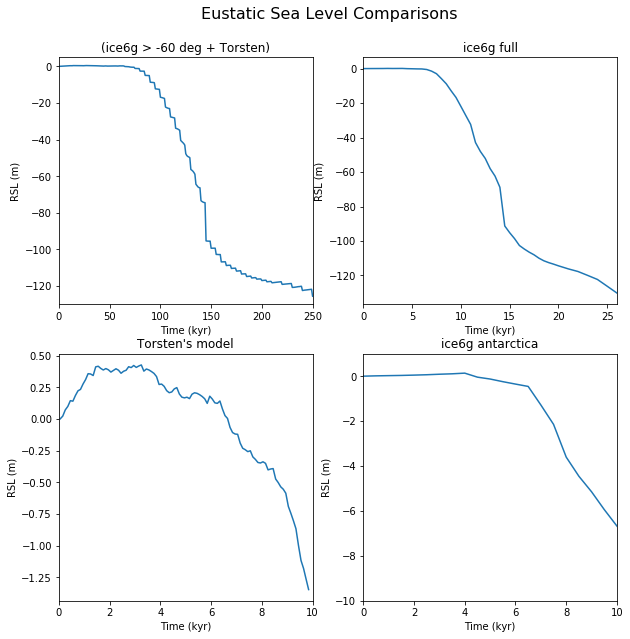

In [6]:
fig = plt.figure(figsize=[10, 10])
fig.suptitle( 'Eustatic Sea Level Comparisons', y=.95, fontsize=16)

comp_RSL = comp.RSL[::-1] * -1
comp_ESL = comp.ESL[::-1]

ax0 = plt.subplot(2, 2, 1)
ax0 = plt.plot(comp_ESL.values)
plt.ylim(-130, 5)
plt.xlim(0, 250)
plt.ylabel('RSL (m)')
plt.xlabel('Time (kyr)')
plt.title('(ice6g > -60 deg + Torsten)');


ax1 = plt.subplot(2, 2, 2)
ax1 = ice6g_f.ESL.plot()
plt.xlim(0, 26)
plt.ylabel('RSL (m)')
plt.xlabel('Time (kyr)')
plt.title('ice6g full');


ax2 = plt.subplot(2, 2, 3)
ax2 = jonny.ESL[250:].plot()
plt.xlim(0, 10)
plt.ylabel('RSL (m)')
plt.xlabel('Time (kyr)')
plt.title('Torsten\'s model');

ax3 = plt.subplot(2, 2, 4)
ax3 = ice6g_a.ESL.plot()
plt.ylim(-10, 1)
plt.xlim(0, 10)
plt.ylabel('RSL (m)')
plt.xlabel('Time (kyr)')
plt.title('ice6g antarctica');


plt.tight_layout;

# Relative Sea Level Plots

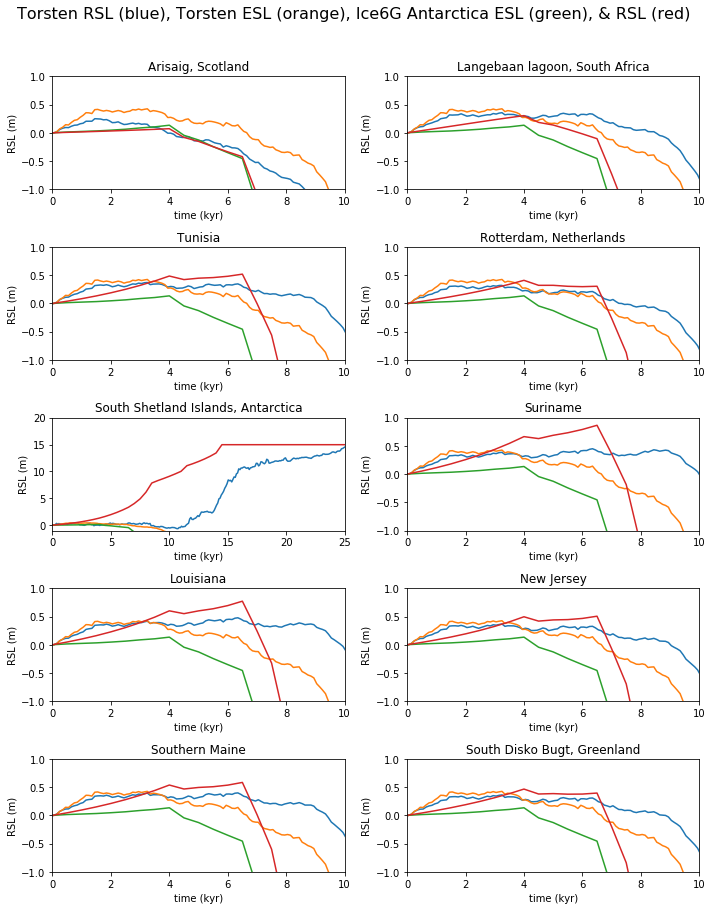

In [14]:
fig = plt.figure(figsize=[10, 17])
fig.suptitle( 'Torsten RSL, Torsten ESL, Ice6G Antarctica ESL, & RSL', y=1.05, fontsize=16)

ax0 = plt.subplot(5, 2, 1)
ax0 = jonny.RSL[100:].sel(lat=56.9101, lon=5.8427, method='nearest').plot()
ax0 = jonny.ESL[250:].plot()
ax0 = ice6g_a.ESL.plot()
ax0 = ice6g_a.RSL.sel(lat=56.9101, lon=5.8427, method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Arisaig, Scotland')

comp_rolling = comp_RSL[89:337].rolling(time=5, center=True).mean()
comp_rolling

ax1 = plt.subplot(5, 2, 2)
ax1 = jonny.RSL[100:].sel(lat=-33.0547, lon=18.0358, method='nearest').plot()
ax1 = jonny.ESL[250:].plot()
ax1 = ice6g_a.ESL.plot()
ax1 = ice6g_a.RSL.sel(lat=-33.0547, lon=18.0358, method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Langebaan lagoon, South Africa')

ax2 = plt.subplot(5, 2, 3)
ax2 = jonny.RSL[100:].sel(lat=33.8869, lon=7.5375, method='nearest').plot()
ax2 = jonny.ESL[250:].plot()
ax2 = ice6g_a.ESL.plot()
ax2 = ice6g_a.RSL.sel(lat=33.8869, lon=7.5375, method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Tunisia');

ax3 = plt.subplot(5, 2, 4)
ax3 = jonny.RSL[100:].sel(lat=51.9244, lon=4.4777, method='nearest').plot()
ax3 = jonny.ESL[250:].plot()
ax3 = ice6g_a.ESL.plot()
ax3 = ice6g_a.RSL.sel(lat=51.9244, lon=4.4777, method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Rotterdam, Netherlands');

ax4 = plt.subplot(5, 2, 5)
ax4 = jonny.RSL.sel(lat=-62.4546, lon=(360 - 60.3413), method='nearest').plot()
ax4 = jonny.ESL[250:].plot()
ax4 = ice6g_a.ESL.plot()
ax4 = ice6g_a.RSL.sel(lat=-62.4546, lon=(360 - 60.3413), method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('South Shetland Islands, Antarctica');

ax5 = plt.subplot(5, 2, 6)
ax5 = jonny.RSL[100:].sel(lat=3.9193, lon=(360 - 56.0278), method='nearest').plot()
ax5 = jonny.ESL[250:].plot()
ax5 = ice6g_a.ESL.plot()
ax5 = ice6g_a.RSL.sel(lat=3.9193, lon=(360 - 56.0278), method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Suriname');

ax6 = plt.subplot(5, 2, 7)
ax6 = jonny.RSL[100:].sel(lat=30.9843, lon=(360 - 91.9623), method='nearest').plot()
ax6 = jonny.ESL[250:].plot()
ax6 = ice6g_a.ESL.plot()
ax6 = ice6g_a.RSL.sel(lat=30.9843, lon=(360 - 91.9623), method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Louisiana');

ax7 = plt.subplot(5, 2, 8)
ax7 = jonny.RSL[100:].sel(lat=40.0583, lon=(360 - 74.4057), method='nearest').plot()
ax7 = jonny.ESL[250:].plot()
ax7 = ice6g_a.ESL.plot()
ax7 = ice6g_a.RSL.sel(lat=40.0583, lon=(360 - 74.4057), method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('New Jersey');

ax8 = plt.subplot(5, 2, 9)
ax8 = jonny.RSL[100:].sel(lat=43.6591, lon=(360 - 70.2568), method='nearest').plot()
ax8 = jonny.ESL[250:].plot()
ax8 = ice6g_a.ESL.plot()
ax8 = ice6g_a.RSL.sel(lat=43.6591, lon=(360 - 70.2568), method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Southern Maine');

ax9 = plt.subplot(5, 2, 10)
ax9 = jonny.RSL[100:].sel(lat=69.2166, lon=(360 - 51.0833), method='nearest').plot()
ax9 = jonny.ESL[250:].plot()
ax9 = ice6g_a.ESL.plot()
ax9 = ice6g_a.RSL.sel(lat=69.2166, lon=(360 - 51.0833), method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('South Disko Bugt, Greenland');

Torsten_RSL  = mpatches.Rectangle((0, 0), 1, .1, facecolor='C0')
Torsten_ESL = mpatches.Rectangle((0, 0), 1, .1, facecolor="C1")
Ice6g_RSL = mpatches.Rectangle((0, 0), 1, .1, facecolor="C2")
Ice6g_ESL = mpatches.Rectangle((0, 0), 1, .1, facecolor="C3")

labels = ['Torsten RSL', 'Torsten ESL', 'Ice6g Ant. RSL','Ice6g Ant. ESL' ]
plt.legend([Torsten_RSL, Torsten_ESL, Ice6g_RSL, Ice6g_ESL], labels,
               loc='lower left', bbox_to_anchor=(0.00, 0), fancybox=True)


plt.tight_layout()

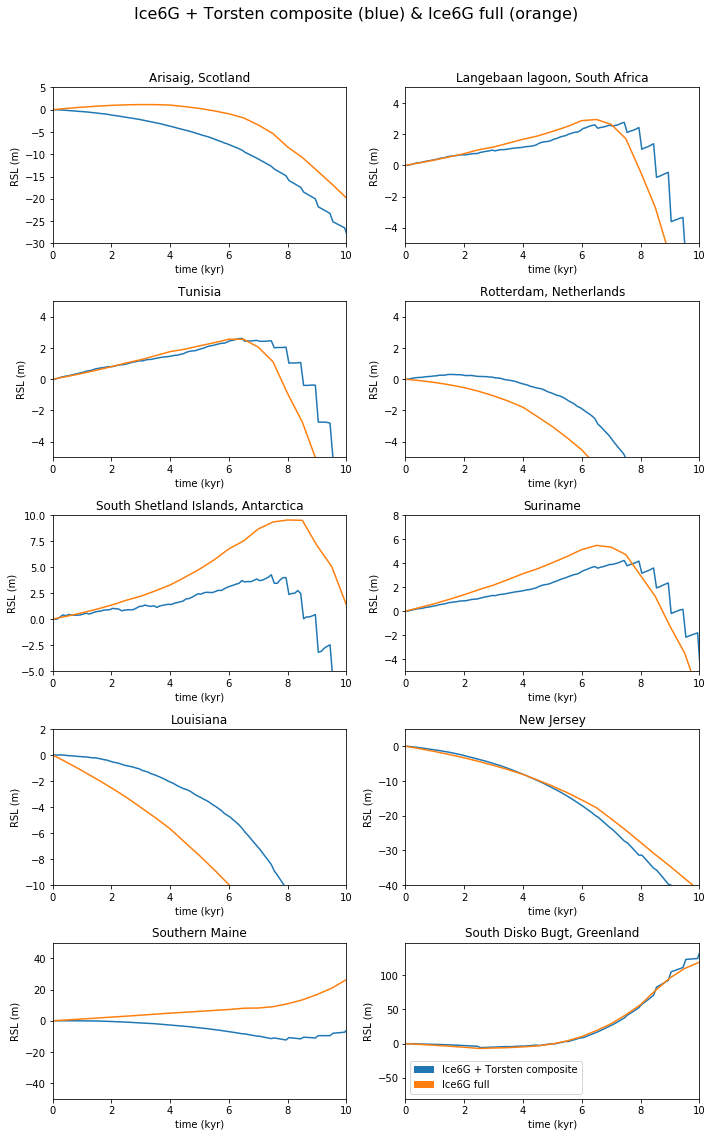

In [13]:
ice6g_rev = ice6g_f.RSL[::-1]

fig = plt.figure(figsize=[10, 15])
fig.suptitle( 'Ice6G + Torsten composite (blue) & Ice6G full (orange)', y=1.05, fontsize=16)

ax0 = plt.subplot(5, 2, 1)
ax0 = comp.RSL[89:].sel(lat=56.9101, lon=5.8427, method='nearest').plot()
ax0 = ice6g_rev.sel(lat=56.9101, lon=5.8427, method='nearest').plot()
plt.ylim(-30, 5)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Arisaig, Scotland')

ax1 = plt.subplot(5, 2, 2)
ax1 = comp.RSL[89:].sel(lat=-33.0547, lon=18.0358, method='nearest').plot()
ax1 = ice6g_rev.sel(lat=-33.0547, lon=18.0358, method='nearest').plot()
plt.ylim(-5, 5)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Langebaan lagoon, South Africa')

ax2 = plt.subplot(5, 2, 3)
ax2 = comp.RSL[89:].sel(lat=33.8869, lon=7.5375, method='nearest').plot()
ax2 = ice6g_rev.sel(lat=33.8869, lon=7.5375, method='nearest').plot()
plt.ylim(-5, 5)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Tunisia');

ax3 = plt.subplot(5, 2, 4)
ax3 = comp.RSL[89:].sel(lat=51.9244, lon=4.4777, method='nearest').plot()
ax3 = ice6g_rev.sel(lat=51.9244, lon=4.4777, method='nearest').plot()
plt.ylim(-5, 5)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Rotterdam, Netherlands');

ax4 = plt.subplot(5, 2, 5)
ax4 = comp.RSL[89:].sel(lat=-62.4546, lon=(360 - 60.3413), method='nearest').plot()
ax4 = ice6g_rev.sel(lat=-62.4546, lon=(360 - 60.3413), method='nearest').plot()
plt.ylim(-5, 10)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('South Shetland Islands, Antarctica');

ax5 = plt.subplot(5, 2, 6)
ax5 = comp.RSL[89:].sel(lat=3.9193, lon=(360 - 56.0278), method='nearest').plot()
ax5 = ice6g_rev.sel(lat=3.9193, lon=(360 - 56.0278), method='nearest').plot()
plt.ylim(-5, 8)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Suriname');

ax6 = plt.subplot(5, 2, 7)
ax6 = comp.RSL[89:].sel(lat=30.9843, lon=(360 - 91.9623), method='nearest').plot()
ax6 = ice6g_rev.sel(lat=30.9843, lon=(360 - 91.9623), method='nearest').plot()
plt.ylim(-10, 2)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Louisiana');

ax7 = plt.subplot(5, 2, 8)
ax7 = comp.RSL[89:].sel(lat=40.0583, lon=(360 - 74.4057), method='nearest').plot()
ax7 = ice6g_rev.sel(lat=40.0583, lon=(360 - 74.4057), method='nearest').plot()
plt.ylim(-40, 5)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('New Jersey');

ax8 = plt.subplot(5, 2, 9)
ax8 = comp.RSL[89:].sel(lat=43.6591, lon=(360 - 70.2568), method='nearest').plot()
ax8 = ice6g_rev.sel(lat=43.6591, lon=(360 - 70.2568), method='nearest').plot()
plt.ylim(-50, 50)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('Southern Maine');

ax9 = plt.subplot(5, 2, 10)
ax9 = comp.RSL[89:].sel(lat=69.2166, lon=(360 - 51.0833), method='nearest').plot()
ax9 = ice6g_rev.sel(lat=69.2166, lon=(360 - 51.0833), method='nearest').plot()
# plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 10)
plt.xlabel('time (kyr)')
plt.title('South Disko Bugt, Greenland');

XX1  = mpatches.Rectangle((0, 0), 1, .1, facecolor='C0')
XX2 = mpatches.Rectangle((0, 0), 1, .1, facecolor="C1")

labels = ['Ice6G + Torsten composite', 'Ice6G full']
plt.legend([XX1, XX2], labels,
               loc='lower left', bbox_to_anchor=(0.00, 0), fancybox=True)

plt.tight_layout()

## Next, I set ice thicknesses & grounding lines to present day values at 4 kyr in the composite Torsten + Ice6G model.  I then ran the modified composite model through the GIA sea level code to isolate a GIA 'correction'.    

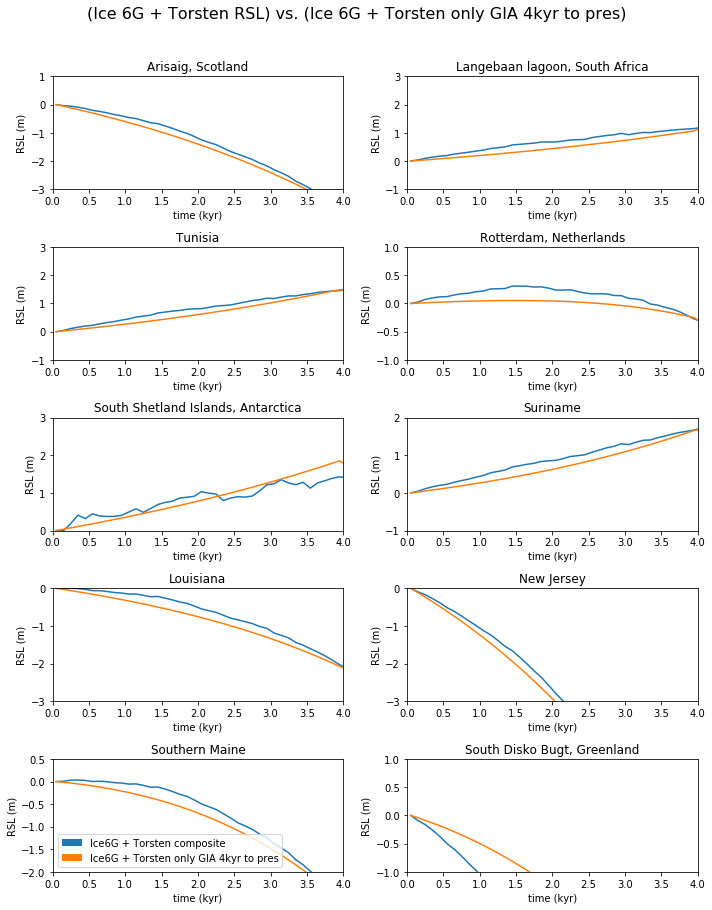

In [15]:
ice6g_rev = ice6g_f.RSL[::-1]

fig = plt.figure(figsize=[10, 12])
fig.suptitle( '(Ice 6G + Torsten RSL) vs. (Ice 6G + Torsten only GIA 4kyr to pres)', y=1.05, fontsize=16)

ax0 = plt.subplot(5, 2, 1)
ax0 = comp.RSL[89:].sel(lat=56.9101, lon=5.8427, method='nearest').plot()
ax0 = comp_p.RSL[89:].sel(lat=56.9101, lon=5.8427, method='nearest').plot()
plt.ylim(-3, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('Arisaig, Scotland')

ax1 = plt.subplot(5, 2, 2)
ax1 = comp.RSL[89:].sel(lat=-33.0547, lon=18.0358, method='nearest').plot()
ax1 = comp_p.RSL[89:].sel(lat=-33.0547, lon=18.0358, method='nearest').plot()
plt.ylim(-1, 3)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('Langebaan lagoon, South Africa')

ax2 = plt.subplot(5, 2, 3)
ax2 = comp.RSL[89:].sel(lat=33.8869, lon=7.5375, method='nearest').plot()
ax2 = comp_p.RSL[89:].sel(lat=33.8869, lon=7.5375, method='nearest').plot()
plt.ylim(-1, 3)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('Tunisia');

ax3 = plt.subplot(5, 2, 4)
ax3 = comp.RSL[89:].sel(lat=51.9244, lon=4.4777, method='nearest').plot()
ax3 = comp_p.RSL[89:].sel(lat=51.9244, lon=4.4777, method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('Rotterdam, Netherlands');

ax4 = plt.subplot(5, 2, 5)
ax4 = comp.RSL[89:].sel(lat=-62.4546, lon=(360 - 60.3413), method='nearest').plot()
ax4 = comp_p.RSL[89:].sel(lat=-62.4546, lon=(360 - 60.3413), method='nearest').plot()
plt.ylim(-0, 3)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('South Shetland Islands, Antarctica');

ax5 = plt.subplot(5, 2, 6)
ax5 = comp.RSL[89:].sel(lat=3.9193, lon=(360 - 56.0278), method='nearest').plot()
ax5 = comp_p.RSL[89:].sel(lat=3.9193, lon=(360 - 56.0278), method='nearest').plot()
plt.ylim(-1, 2)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('Suriname');

ax6 = plt.subplot(5, 2, 7)
ax6 = comp.RSL[89:].sel(lat=30.9843, lon=(360 - 91.9623), method='nearest').plot()
ax6 = comp_p.RSL[89:].sel(lat=30.9843, lon=(360 - 91.9623), method='nearest').plot()
plt.ylim(-3, 0)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('Louisiana');

ax7 = plt.subplot(5, 2, 8)
ax7 = comp.RSL[89:].sel(lat=40.0583, lon=(360 - 74.4057), method='nearest').plot()
ax7 = comp_p.RSL[89:].sel(lat=40.0583, lon=(360 - 74.4057), method='nearest').plot()
plt.ylim(-3, 0)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('New Jersey');

ax8 = plt.subplot(5, 2, 9)
ax8 = comp.RSL[89:].sel(lat=43.6591, lon=(360 - 70.2568), method='nearest').plot()
ax8 = comp_p.RSL[89:].sel(lat=43.6591, lon=(360 - 70.2568), method='nearest').plot()
plt.ylim(-2, .5)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('Southern Maine');

XX1  = mpatches.Rectangle((0, 0), 1, .1, facecolor='C0')
XX2 = mpatches.Rectangle((0, 0), 1, .1, facecolor="C1")

labels = ['Ice6G + Torsten composite', 'Ice6G + Torsten only GIA 4kyr to pres']
plt.legend([XX1, XX2], labels,
               loc='lower left', bbox_to_anchor=(0.00, 0), fancybox=True)


ax9 = plt.subplot(5, 2, 10)
ax9 = comp.RSL[89:].sel(lat=69.2166, lon=(360 - 51.0833), method='nearest').plot()
ax9 = comp_p.RSL[89:].sel(lat=69.2166, lon=(360 - 51.0833), method='nearest').plot()
plt.ylim(-1, 1)
plt.ylabel('RSL (m)')
plt.xlim(0, 4)
plt.xlabel('time (kyr)')
plt.title('South Disko Bugt, Greenland');

plt.tight_layout()

# Part II:  Nicole Khan's Dataset of Holocene Sea Levels

In [8]:
# read in Nicole Khan's data
df = pd.read_csv('HOLSEAdata_120816_3.csv',  header=None, skiprows=2, names=['ObjectID', 'Dbnum', 'Database', 
                                                                             'Zone', 'Region', 'SubRegion', 'Sample ID', 
                                                                             'Latitude', 'Longitude', 'RSL', 'RSL_er_max',
                                                                             'RSL_er_min', 'Age', 'Age_er_max', 'Age_er_min',
                                                                             'Indicator', 'Indicative meaning'])
# Clean dataframe
dfs = df.drop(columns=['ObjectID', 'Sample ID', 'Indicator', 'Indicative meaning'])
dfs = dfs.replace('\s+', '_',regex=True)
dfs = dfs.replace('\(', '_',regex=True)
dfs = dfs.replace('\)', '_',regex=True)
dfs = dfs.replace('#', '_',regex=True)
dfs = dfs.replace('\.', '_',regex=True)
dfs = dfs.replace(' ', '_', regex=True)
dfs = dfs.replace('&', '_', regex=True)
dfs = dfs.replace('\_+', '_',regex=True)
dfs = dfs.replace(' ', '_', regex=True)

# Create function to turn ages into thousand year increments
def reduce(x):
    x = x/1000
    return x
#apply reduce function to dataframe
dfs[['Age', 'Age_er_max', 'Age_er_max']] = dfs[['Age', 'Age_er_max',
    'Age_er_max']].apply(reduce)

# split dataframe into groupby categories
database = dfs.groupby('Database')
regs = dfs.groupby('Region')
subregs = dfs.groupby('SubRegion')

## Visualize RSL measurements vs. RSL models Part 1: The Americas

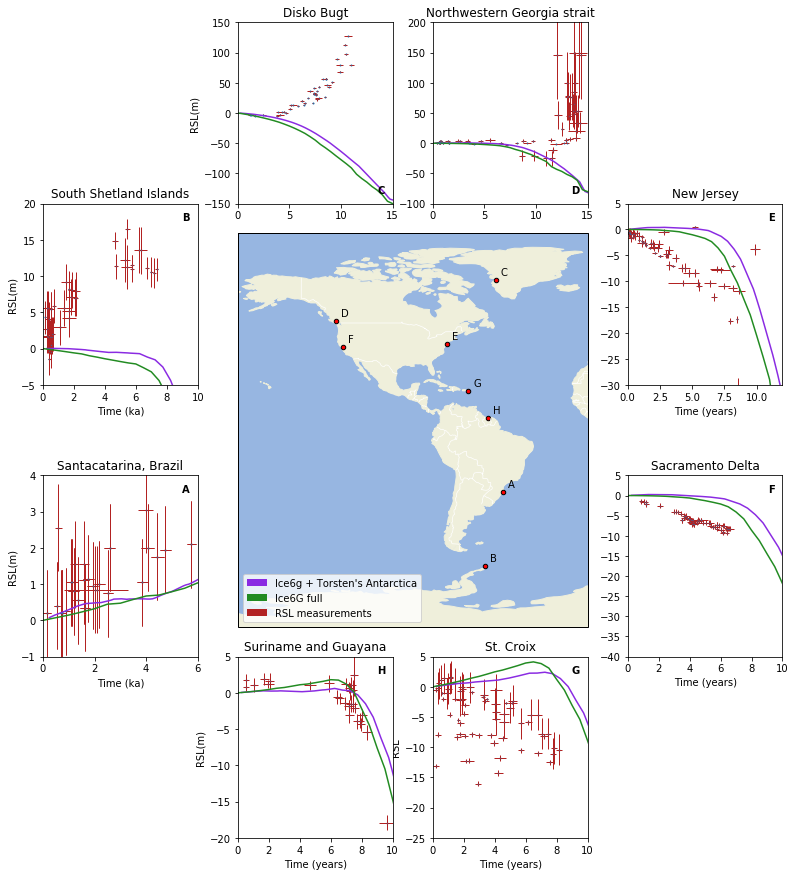

In [12]:
fig.suptitle('RSL in The Americas: Measurements vs. models', y=.92, fontsize=20)


subset = [4416, 8790, 0, 1866,1360, 2560, 4287, 4355,]
Lats = dfs.Latitude.iloc[subset].get_values()
Lons = dfs.Longitude.iloc[subset].get_values()
df_subset = dfs.iloc[subset]


fig = plt.figure(figsize=(15, 15))
grid = plt.GridSpec(9, 9, hspace=0, wspace=.7)

main_ax = fig.add_subplot(grid[2:7, 3:7], projection=ccrs.PlateCarree())
extent = [-170, -10, -90, 90]
main_ax.set_extent(extent)
main_ax.add_feature(cfeature.OCEAN)
main_ax.add_feature(cfeature.LAND)
main_ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.7)
main_ax.scatter(Lons, Lats, s=20, c='Red', marker="o", edgecolor='k')

Ice6G_Torsten = mpatches.Rectangle((0, 0), 1, .2, facecolor="blueviolet")
Ice6G_Full = mpatches.Rectangle((0, 0), 1, .2, facecolor="forestgreen")
Data = mpatches.Rectangle((0, 0), 1, .2, facecolor="firebrick")
labels = ['Ice6g + Torsten\'s Antarctica',
              'Ice6G full', 'RSL measurements']
main_ax.legend([Ice6G_Torsten, Ice6G_Full, Data], labels,
               loc='lower left', bbox_to_anchor=(0.00, 0), fancybox=True)

#Add geographic locations on projected figure
n = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for i, txt in enumerate(n):
    main_ax.annotate(txt, (Lons[i], Lats[i]), xycoords='data', 
                     xytext=(5, 5), textcoords='offset points')

    
y_1 = fig.add_subplot(grid[5:7, 1:3])  
SC = subregs.get_group('SantaCatarina') 
x = SC.Age
y = SC.RSL
lat = SC.Latitude.mean()
lon = SC.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_1, xlim=(0, 6), ylim=(-1, 4), color='blueviolet')
ice6g_rev.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_1, xlim=(0, 6), ylim=(-1, 4), color='forestgreen')
y_1.scatter(x, y, s=1)
y_1.errorbar(x, y, xerr=SC.Age_er_max, yerr = SC.RSL_er_min, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Santacatarina, Brazil'
y_1.set_title(title)
y_1.set_ylabel('RSL(m)')
y_1.set_xlabel('Time (ka)')
y_1.text(0.95, 0.95, 'A', horizontalalignment='right',
     verticalalignment='top', transform=y_1.transAxes, fontweight='bold')


y_2 = fig.add_subplot(grid[2:4, 1:3])  
SSI = regs.get_group('South_Shetland_Islands') 
x = SSI.Age
y = SSI.RSL
lat = SSI.Latitude.mean()
lon = SSI.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_2, xlim=(0, 10), ylim=(-5, 20), color='blueviolet')
ice6g_rev.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_2, xlim=(0, 10), ylim=(-5, 20), color='forestgreen')
y_2.scatter(x, y, s=1)
y_2.errorbar(x, y, xerr=SSI.Age_er_max, yerr = SSI.RSL_er_max, fmt = 'o', ms = .2,
             elinewidth=1, ecolor='firebrick')
title = 'South Shetland Islands'
y_2.set_title(title)
y_2.set_ylabel('RSL(m)')
y_2.set_xlabel('Time (ka)')
y_2.text(0.95, 0.95, 'B', horizontalalignment='right',
     verticalalignment='top', transform=y_2.transAxes, fontweight='bold')


y_3 = fig.add_subplot(grid[0:2, 3:5])
NGS = regs.get_group('Disko_Bugt') 
x = NGS.Age
y = NGS.RSL
xerr = NGS.Age_er_max
yerr = NGS.RSL_er_max
lat = NGS.Latitude.mean()
lon = NGS.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_3, xlim=(0, 15), ylim=(-150, 150), color='blueviolet')
ice6g_rev.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_3, xlim=(0, 15), ylim=(-150, 150), color='forestgreen')
y_3.scatter(x, y, s=1)
y_3.errorbar(x, y, xerr=xerr, yerr = yerr, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Disko Bugt'
y_3.set_title(title)
y_3.set_ylabel('RSL(m)')
y_3.set_xlabel('')
y_3.text(0.90, 0.10, 'C', horizontalalignment='left',
     verticalalignment='top', transform=y_3.transAxes, fontweight='bold')


y_4 = fig.add_subplot(grid[0:2, 5:7])
SS = regs.get_group('Northwestern_Georgia_strait_3_') 
x = SS.Age
y = SS.RSL
lat = SS.Latitude.mean()
lon = SS.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_4, xlim=(0, 15), ylim=(-100, 200), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_4, xlim=(0, 15), ylim=(-100, 200), color='forestgreen')
y_4.scatter(x, y, s=1)
errmean = (SS.RSL_er_max + SS.RSL_er_min)/2
y_4.errorbar(x, y, xerr=SS.Age_er_max, yerr = errmean, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Northwestern Georgia strait'
y_4.set_title(title)
y_4.set_xlabel('')
y_4.set_ylabel('')
y_4.text(0.95, 0.10, 'D', horizontalalignment='right',
     verticalalignment='top', transform=y_4.transAxes, fontweight='bold')

y_5 = fig.add_subplot(grid[2:4, 7:9])  
DB = subregs.get_group('New_Jersey') 
x = DB.Age
y = DB.RSL
lat = DB.Latitude.mean()
lon = DB.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_5, xlim=(0, 12), ylim=(-30, 5), color='blueviolet')
ice6g_rev.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_5, xlim=(0, 12), ylim=(-30, 5), color='forestgreen')
y_5.scatter(x, y, s=1)
y_5.errorbar(x, y, xerr=DB.Age_er_max, yerr = DB.RSL_er_max, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'New Jersey'
y_5.set_title(title)
y_5.set_ylabel('')
y_5.set_xlabel('Time (years)')
y_5.text(0.95, 0.95, 'E', horizontalalignment='right',
     verticalalignment='top', transform=y_5.transAxes, fontweight='bold')


y_6 = fig.add_subplot(grid[5:7, 7:9])
PN = subregs.get_group('Sacramento_Delta') 
x = PN.Age
y = PN.RSL
lat = PN.Latitude.mean()
lon = PN.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_6, xlim=(0, 10), ylim=(-40, 5), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_6, xlim=(0, 10), ylim=(-40, 5), color='forestgreen')
y_6.scatter(x, y, s=1)
y_6.errorbar(x, y, xerr=PN.Age_er_max, yerr = PN.RSL_er_min, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Sacramento Delta'
y_6.set_title(title)
y_6.set_ylabel('')
y_6.set_xlabel('Time (years)')
y_6.text(0.95, 0.95, 'F', horizontalalignment='right',
     verticalalignment='top', transform=y_6.transAxes, fontweight='bold')
 

y_7 = fig.add_subplot(grid[7:9, 5:7])
SG = subregs.get_group('St_Croix') 
x = SG.Age
y = SG.RSL
lat = SG.Latitude.mean()
lon = SG.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_7, xlim=(0, 10), ylim=(-25, 5), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_7, xlim=(0, 10), ylim=(-25, 5), color='forestgreen')
y_7.scatter(x, y, s=1)
y_7.errorbar(x, y, xerr=SG.Age_er_max, yerr = SG.RSL_er_max, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'St. Croix'
y_7.set_title(title)
y_7.set_xlabel('Time (years)')
y_7.text(0.95, 0.95, 'G', horizontalalignment='right',
     verticalalignment='top', transform=y_7.transAxes, fontweight='bold')


y_8 = fig.add_subplot(grid[7:9, 3:5])
SC = subregs.get_group('Suriname_and_Guayana') 
x = SC.Age
y = SC.RSL
lat = SC.Latitude.mean()
lon = SC.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_8, xlim=(0, 10), ylim=(-20, 5), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_8, xlim=(0, 10), ylim=(-20, 5), color='forestgreen')
y_8.scatter(x, y, s=1)
y_8.errorbar(x, y, xerr=SC.Age_er_max, yerr = SC.RSL_er_max, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Suriname and Guayana'
y_8.set_title(title)
y_8.set_ylabel('RSL(m)')
y_8.set_xlabel('Time (years)')
y_8.text(0.95, 0.95, 'H', horizontalalignment='right',
     verticalalignment='top', transform=y_8.transAxes, fontweight='bold');


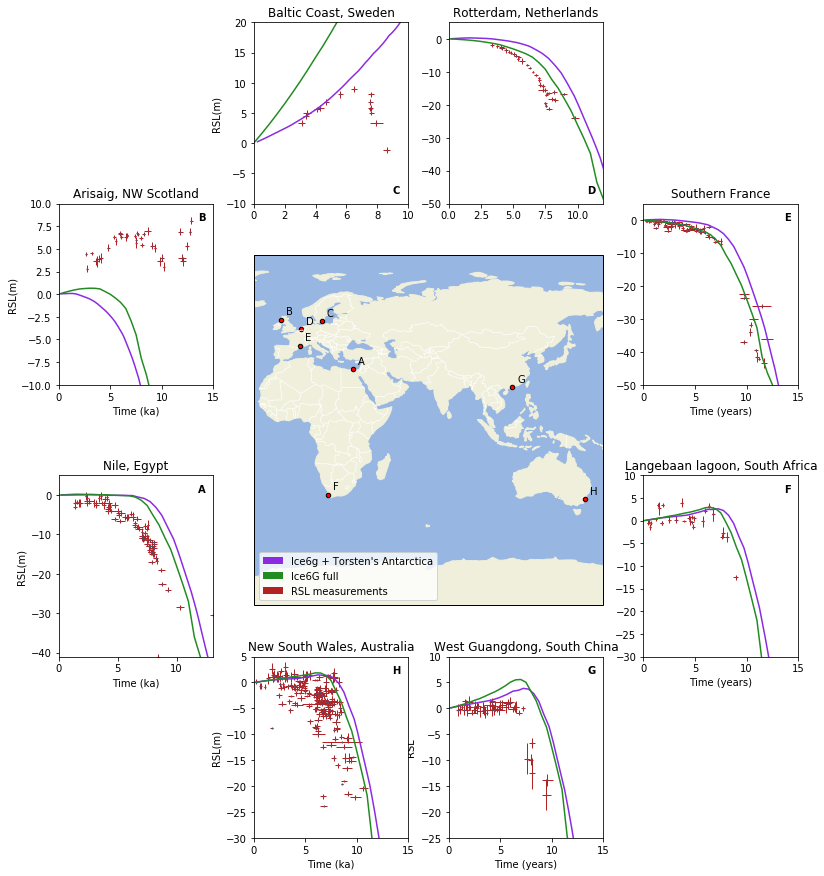

In [742]:
fig.suptitle( 'RSL in Europe, Africa, and Asia: Measurements vs. Models', y=.92, fontsize=20)

subset = [6849, 5511, 6149, 6164, 6275, 6928, 7904, 8829,]
Lats = dfs.Latitude.iloc[subset].get_values()
Lons = dfs.Longitude.iloc[subset].get_values()
df_subset = dfs.iloc[subset]


fig = plt.figure(figsize=(15, 15))
grid = plt.GridSpec(9, 9, hspace=0, wspace=.7)

main_ax = fig.add_subplot(grid[2:7, 3:7], projection=ccrs.PlateCarree())
extent = [-20, 160, -90, 90]
main_ax.set_extent(extent)
main_ax.add_feature(cfeature.OCEAN)
main_ax.add_feature(cfeature.LAND)
main_ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.7)
main_ax.scatter(Lons, Lats, s=20, c='Red', marker="o", edgecolor='k')


Ice6G_Torsten = mpatches.Rectangle((0, 0), 1, .2, facecolor="blueviolet")
Ice6G_Full = mpatches.Rectangle((0, 0), 1, .2, facecolor="forestgreen")
Data = mpatches.Rectangle((0, 0), 1, .2, facecolor="firebrick")
labels = ['Ice6g + Torsten\'s Antarctica',
              'Ice6G full', 'RSL measurements']
main_ax.legend([Ice6G_Torsten, Ice6G_Full, Data], labels,
               loc='lower left', bbox_to_anchor=(0.00, 0), fancybox=True)

n = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

for i, txt in enumerate(n):
    main_ax.annotate(txt, (Lons[i], Lats[i]), xycoords='data', 
                     xytext=(5, 5), textcoords='offset points')
    
# Set figures
y_1 = fig.add_subplot(grid[5:7, 1:3])  
SC = subregs.get_group('Nile') 
x = SC.Age
y = SC.RSL
lat = SC.Latitude.mean()
lon = SC.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_1, xlim=x.max(), ylim=(y.min(), 5), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_1, xlim=(0, x.max()), ylim=(y.min(), 5), color='forestgreen')

y_1.scatter(x, y, s=1, color='r')
y_1.errorbar(x, y, xerr=SC.Age_er_max, yerr = SC.RSL_er_min, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Nile, Egypt'
y_1.set_title(title)
y_1.set_ylabel('RSL(m)')
y_1.set_xlabel('Time (ka)')
y_1.text(0.95, 0.95, 'A', horizontalalignment='right',
     verticalalignment='top', transform=y_1.transAxes, fontweight='bold')

y_2 = fig.add_subplot(grid[2:4, 1:3])  
SSI = regs.get_group('NW_Scotland_Arisaig_') 
x = SSI.Age
y = SSI.RSL
lat = SSI.Latitude.mean()
lon = SSI.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_2, xlim=(0, 15), ylim=(-10, 10), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_2, xlim=(0, 15), ylim=(-10, 10), color='forestgreen')
y_2.scatter(x, y, s=1, color='r')
y_2.errorbar(x, y, xerr=SSI.Age_er_max, yerr = SSI.RSL_er_max, fmt = 'o', ms = .2,
             elinewidth=1, ecolor='firebrick')
title = 'Arisaig, NW Scotland'
y_2.set_title(title)
y_2.set_ylabel('RSL(m)')
y_2.set_xlabel('Time (ka)')
y_2.text(0.95, 0.95, 'B', horizontalalignment='right',
     verticalalignment='top', transform=y_2.transAxes, fontweight='bold')


y_3 = fig.add_subplot(grid[0:2, 3:5])
NGS = regs.get_group('Baltic_coast_Sweden') 
x = NGS.Age
y = NGS.RSL
xerr = NGS.Age_er_max
yerr = NGS.RSL_er_max
lat = NGS.Latitude.mean()
lon = NGS.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_3, xlim=(0, 10), ylim=(-10, 20), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_3, xlim=(0, 10), ylim=(-10, 20), color='forestgreen')
y_3.scatter(x, y, s=1, color='r')
y_3.errorbar(x, y, xerr=xerr, yerr = yerr, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Baltic Coast, Sweden'
y_3.set_title(title)
y_3.set_ylabel('RSL(m)')
y_3.set_xlabel('')
y_3.text(0.90, 0.10, 'C', horizontalalignment='left',
     verticalalignment='top', transform=y_3.transAxes, fontweight='bold')


y_4 = fig.add_subplot(grid[0:2, 5:7])
SS = regs.get_group('The_Netherlands') 
x = SS.Age
y = SS.RSL
lat = SS.Latitude.mean()
lon = SS.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_4, xlim=(0, 12), ylim=(-50, 5), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_4, xlim=(0, 12), ylim=(-50, 5), color='forestgreen')
y_4.scatter(x, y, s=1, c='r')
y_4.errorbar(x, y, xerr=SS.Age_er_max, yerr = SS.RSL_er_max, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Rotterdam, Netherlands'
y_4.set_title(title)
y_4.set_xlabel('')
y_4.set_ylabel('')
y_4.text(0.95, 0.10, 'D', horizontalalignment='right',
     verticalalignment='top', transform=y_4.transAxes, fontweight='bold')

y_5 = fig.add_subplot(grid[2:4, 7:9])  
DB = subregs.get_group('Southern_France') 
x = DB.Age
y = DB.RSL
lat = DB.Latitude.mean()
lon = DB.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_5, xlim=(0, 15), ylim=(-50, 5), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_5, xlim=(0, 15), ylim=(-50, 5), color='forestgreen')
y_5.scatter(x, y, s=1, color='r')
y_5.errorbar(x, y, xerr=DB.Age_er_max, yerr = DB.RSL_er_max, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Southern France'
y_5.set_title(title)
y_5.set_ylabel('')
y_5.set_xlabel('Time (years)')
y_5.text(0.95, 0.95, 'E', horizontalalignment='right',
     verticalalignment='top', transform=y_5.transAxes, fontweight='bold')


y_6 = fig.add_subplot(grid[5:7, 7:9])
PN = regs.get_group('South_Africa') 
x = PN.Age
y = PN.RSL
lat = PN.Latitude.mean()
lon = PN.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_6, xlim=(0, 15), ylim=(-30, 10), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_6, xlim=(0, 15), ylim=(-30, 10), color='forestgreen')
y_6.scatter(x, y, s=1, color='r')
y_6.errorbar(x, y, xerr=PN.Age_er_max, yerr = PN.RSL_er_min, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'Langebaan lagoon, South Africa'
y_6.set_title(title)
y_6.set_ylabel('')
y_6.set_xlabel('Time (years)')
y_6.text(0.95, 0.95, 'F', horizontalalignment='right',
     verticalalignment='top', transform=y_6.transAxes, fontweight='bold')
 

y_7 = fig.add_subplot(grid[7:9, 5:7])
SG = subregs.get_group('South_China_III_West_Guangdong_and_Hainan_') 
x = SG.Age
y = SG.RSL
lat = SG.Latitude.mean()
lon = SG.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_7, xlim=(0, 15), ylim=(-25, 10), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_7, xlim=(0, 15), ylim=(-25, 10), color='forestgreen')
y_7.scatter(x, y, s=1, color='r')
y_7.errorbar(x, y, xerr=SG.Age_er_max, yerr = SG.RSL_er_max, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'West Guangdong, South China'
y_7.set_title(title)
y_7.set_ylabel('') 
y_7.set_xlabel('Time (years)')
y_7.text(0.95, 0.95, 'G', horizontalalignment='right',
     verticalalignment='top', transform=y_7.transAxes, fontweight='bold')


y_8 = fig.add_subplot(grid[7:9, 3:5])
SC = regs.get_group('New_South_Wales_Australia') 
x = SC.Age
y = SC.RSL
lat = SC.Latitude.mean()
lon = SC.Longitude.mean()
comp.RSL[89:].rolling(time=5, center=True).mean().sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_8, xlim=(0, 15), ylim=(-30, 5), color='blueviolet')
ice6g_f.RSL.sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_8, xlim=(0, 15), ylim=(-30, 5), color='forestgreen')
y_8.scatter(x, y, s=1, color='r')
y_8.errorbar(x, y, xerr=SC.Age_er_max, yerr = SC.RSL_er_max, fmt = 'o', ms = .2,
            elinewidth=1, ecolor='firebrick')
title = 'New South Wales, Australia'
y_8.set_title(title)
y_8.set_ylabel('RSL(m)')
y_8.set_xlabel('Time (ka)')
y_8.text(0.95, 0.95, 'H', horizontalalignment='right',
     verticalalignment='top', transform=y_8.transAxes, fontweight='bold');




### Finally, I subtract Composite GIA correction from Composite model to get rate of RSL change during the last 4000 years and plot it, as before, around a projection.

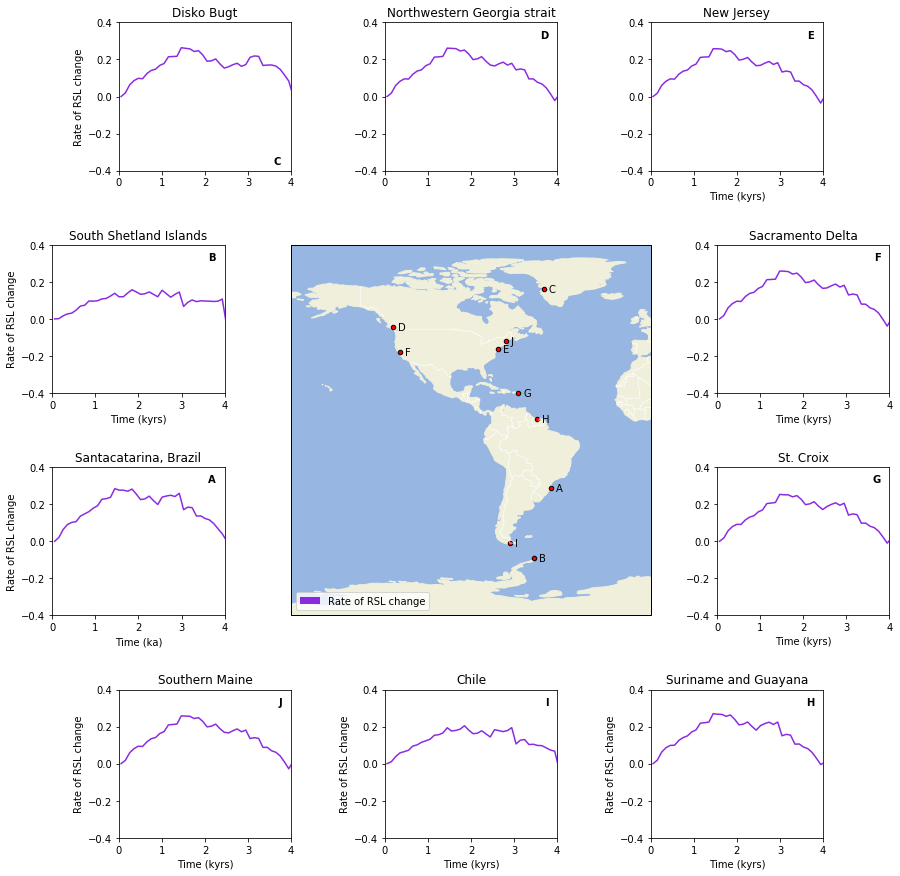

In [770]:
fig.suptitle( 'RSL in The Americas: Measurements vs. models', y=.92, fontsize=20)


subset = [4416, 8790, 0, 1866,1360, 2560, 4287, 4355, 4575, 1011]
Lats = dfs.Latitude.iloc[subset].get_values()
Lons = dfs.Longitude.iloc[subset].get_values()
df_subset = dfs.iloc[subset]


fig = plt.figure(figsize=(15, 15))
grid = plt.GridSpec(11, 13, hspace=0, wspace=0.7)

main_ax = fig.add_subplot(grid[3:8, 3:10], projection=ccrs.PlateCarree())
extent = [-175, 0, -90, 90]
main_ax.set_extent(extent)
main_ax.add_feature(cfeature.OCEAN)
main_ax.add_feature(cfeature.LAND)
main_ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.7)
main_ax.scatter(Lons, Lats, s=20, c='Red', marker="o", edgecolor='k')

Ice6G_Torsten = mpatches.Rectangle((0, 0), 1, .2, facecolor="blueviolet")
labels = ['Rate of RSL change']
main_ax.legend([Ice6G_Torsten, Ice6G_Full, Data], labels,
               loc='lower left', bbox_to_anchor=(0.00, 0), fancybox=True)


n = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']

for i, txt in enumerate(n):
    main_ax.annotate(txt, (Lons[i], Lats[i]), xycoords='data', 
                     xytext=(5, -3), textcoords='offset points')
    
y_1 = fig.add_subplot(grid[6:8, 0:3])  
SC = subregs.get_group('SantaCatarina') 
x = SC.Age
y = SC.RSL
lat = SC.Latitude.mean()
lon = SC.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_1, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'Santacatarina, Brazil'
y_1.set_title(title)
y_1.set_ylabel('Rate of RSL change')
y_1.set_xlabel('Time (ka)')
y_1.text(0.95, 0.95, 'A', horizontalalignment='right',
     verticalalignment='top', transform=y_1.transAxes, fontweight='bold')

y_2 = fig.add_subplot(grid[3:5, 0:3])  
SSI = regs.get_group('South_Shetland_Islands') 
x = SSI.Age
y = SSI.RSL
lat = SSI.Latitude.mean()
lon = SSI.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_2, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'South Shetland Islands'
y_2.set_title(title)
y_2.set_ylabel('Rate of RSL change')
y_2.set_xlabel('Time (kyrs)')
y_2.text(0.95, 0.95, 'B', horizontalalignment='right',
     verticalalignment='top', transform=y_2.transAxes, fontweight='bold')


y_3 = fig.add_subplot(grid[0:2, 1:4])
NGS = regs.get_group('Disko_Bugt') 
x = NGS.Age
y = NGS.RSL
xerr = NGS.Age_er_max
yerr = NGS.RSL_er_max
lat = NGS.Latitude.mean()
lon = NGS.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_3, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'Disko Bugt'
y_3.set_title(title)
y_3.set_ylabel('Rate of RSL change')
y_3.set_xlabel('')
y_3.text(0.90, 0.10, 'C', horizontalalignment='left',
     verticalalignment='top', transform=y_3.transAxes, fontweight='bold')


y_4 = fig.add_subplot(grid[0:2, 5:8])
SS = regs.get_group('Northwestern_Georgia_strait_3_') 
x = SS.Age
y = SS.RSL
lat = SS.Latitude.mean()
lon = SS.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_4, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'Northwestern Georgia strait'
y_4.set_title(title)
y_4.set_xlabel('')
y_4.set_ylabel('')
y_4.text(0.95, 0.95, 'D', horizontalalignment='right',
     verticalalignment='top', transform=y_4.transAxes, fontweight='bold')

y_5 = fig.add_subplot(grid[0:2, 9:12])  
DB = subregs.get_group('New_Jersey') 
x = DB.Age
y = DB.RSL
lat = DB.Latitude.mean()
lon = DB.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_5, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'New Jersey'
y_5.set_title(title)
y_5.set_ylabel('')
y_5.set_xlabel('Time (kyrs)')
y_5.text(0.95, 0.95, 'E', horizontalalignment='right',
     verticalalignment='top', transform=y_5.transAxes, fontweight='bold')


y_6 = fig.add_subplot(grid[3:5, 10:13])
PN = subregs.get_group('Sacramento_Delta') 
x = PN.Age
y = PN.RSL
lat = PN.Latitude.mean()
lon = PN.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_6, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'Sacramento Delta'
y_6.set_title(title)
y_6.set_ylabel('')
y_6.set_xlabel('Time (kyrs)')
y_6.text(0.95, 0.95, 'F', horizontalalignment='right',
     verticalalignment='top', transform=y_6.transAxes, fontweight='bold')
 

y_7 = fig.add_subplot(grid[6:8, 10:13])
SG = subregs.get_group('St_Croix') 
x = SG.Age
y = SG.RSL
lat = SG.Latitude.mean()
lon = SG.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_7, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'St. Croix'
y_7.set_title(title)
y_7.set_xlabel('Time (kyrs)')
y_7.set_ylabel('')
y_7.text(0.95, 0.95, 'G', horizontalalignment='right',
     verticalalignment='top', transform=y_7.transAxes, fontweight='bold')


y_8 = fig.add_subplot(grid[9:11, 9:12])
SC = subregs.get_group('Suriname_and_Guayana') 
x = SC.Age
y = SC.RSL
lat = SC.Latitude.mean()
lon = SC.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_8, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'Suriname and Guayana'
y_8.set_title(title)
y_8.set_ylabel('Rate of RSL change')
y_8.set_xlabel('Time (kyrs)')
y_8.text(0.95, 0.95, 'H', horizontalalignment='right',
     verticalalignment='top', transform=y_8.transAxes, fontweight='bold');

y_9 = fig.add_subplot(grid[9:11, 5:8])
BC = subregs.get_group('BeagleChannel') 
x = BC.Age
y = BC.RSL
lat = BC.Latitude.mean()
lon = BC.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_9, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'Chile'
y_9.set_title(title)
y_9.set_ylabel('Rate of RSL change')
y_9.set_xlabel('Time (kyrs)')
y_9.text(0.95, 0.95, 'I', horizontalalignment='right',
     verticalalignment='top', transform=y_9.transAxes, fontweight='bold');

y_10 = fig.add_subplot(grid[9:11, 1:4])
SM = subregs.get_group('Southern_Maine') 
x = SM.Age
y = SM.RSL
lat = SM.Latitude.mean()
lon = SM.Longitude.mean()
chrate.RSL[89:].sel(lat=lat, lon=lon, 
                  method='nearest').plot(ax=y_10, xlim=(0, 4), ylim=(-0.4, 0.4), color='blueviolet')
title = 'Southern Maine'
y_10.set_title(title)
y_10.set_ylabel('Rate of RSL change')
y_10.set_xlabel('Time (kyrs)')
y_10.text(0.95, 0.95, 'J', horizontalalignment='right',
     verticalalignment='top', transform=y_10.transAxes, fontweight='bold');


# XXXXXXXXXXXX    End    XXXXXXXXXXXXXX